# Spotify Music Ayalysis


Here, the Spotify Music dataset is used for analyzing 

## Installation and data import

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

In [ ]:
from zipfile import ZipFile
file_name = "spotify-dataset-19212020-160k-tracks.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats 


## Comparison of number of Songs released per year


In [8]:
# Using 'data.csv' file to count number of Songs released per year.
df_data = pd.read_csv('data_o.csv')

df1 = df_data.loc[:,["year","name"]]
df1 = df1.groupby(by="year").count()
df1 = df1.rename(columns={"name":"number of songs"})
df1 = df1.reset_index()
print(df1)

    year  number of songs
0   1921              150
1   1922               71
2   1923              185
3   1924              236
4   1925              278
..   ...              ...
95  2016             1797
96  2017             1992
97  2018             2103
98  2019             1949
99  2020             2030

[100 rows x 2 columns]


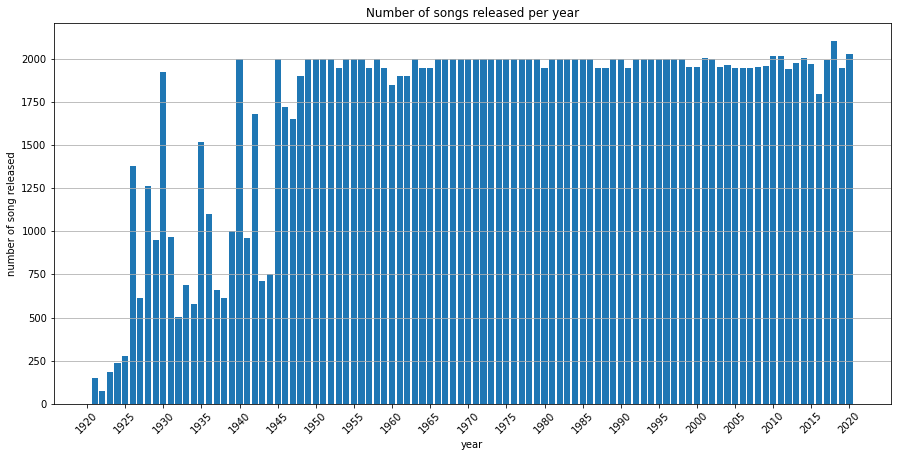

In [9]:
x = df1["year"]
y = df1["number of songs"]


plt.figure(figsize=(15, 7))
plt.bar(x,y)
plt.title("Number of songs released per year")
plt.xlabel("year")
plt.ylabel("number of song released")
x_ticks = np.linspace(1920, 2020, 21)
plt.xticks(x_ticks,rotation=45)
plt.grid(axis='y')

plt.show()

  As graph shown above, it was the first to release over 1,000 songs in 1926 on Spotify. And in 2018, it reached the maximum overall with 2103 songs released.

## Find the years that had the highest average danceability scores on the songs.



In [11]:
# Using 'data_by_year.csv' file to find the years that had the highest average danceability scores on the songs.
df_year = pd.read_csv('data_by_year_o.csv')
df2 = df_year.sort_values(by='danceability',ascending=False).loc[:,['year','danceability']]
df2.head()

,year,danceability
99,2020,0.692904
97,2018,0.663500
6,1927,0.648268
8,1929,0.647670
98,2019,0.644814


  2020 had the highest average danceability scores (0.692904) on the songs.

## Output the top 3 artists that had the most danceable songs.


In [12]:
# Using 'data_by_artist.csv' file to find the top 3 artists that had the most danceable songs.
df_artist = pd.read_csv('data_by_artist_o.csv')
df3 = df_artist.sort_values(by='danceability',ascending=False).loc[:,['artists','danceability']]
df3.head(3)

,artists,danceability
27871,Young Bo,0.986
27874,Young Boss,0.986
10672,ITSOKTOCRY,0.985


  Young Bo, Young Boss, and ITSOKTOCKY had the most danceable songs with average danceability 0.986 and 0.985.	

## Compare each genre of song based on Acousticness, Energy and Liveliness.

In [13]:
# Using 'data_by_genres.csv' file to compare each genre of song.
df_genres = pd.read_csv('data_by_genres_o.csv')
df_genres.count()

mode                2973
genres              2973
acousticness        2973
danceability        2973
duration_ms         2973
energy              2973
instrumentalness    2973
liveness            2973
loudness            2973
speechiness         2973
tempo               2973
valence             2973
popularity          2973
key                 2973
dtype: int64

  In this database, songs are classified into 2973 genres, which is too massive to analyze. Thus, here selecting Top 20 popular genres of songs for analysis.

In [15]:
df4 = df_genres.sort_values(by='popularity',ascending=False).loc[:,['genres','acousticness','energy','liveness','popularity']]
df4 = df4.set_index('genres').reset_index().loc[0:20,:]
df4.head()

,genres,acousticness,energy,liveness,popularity
0,basshall,0.213167,0.630167,0.081067,80.666667
1,turkish edm,0.008290,0.719000,0.326000,80.000000
2,south african house,0.043833,0.562333,0.075133,80.000000
3,trap venezolano,0.044600,0.777000,0.086300,80.000000
4,alberta hip hop,0.330000,0.685000,0.148000,78.500000


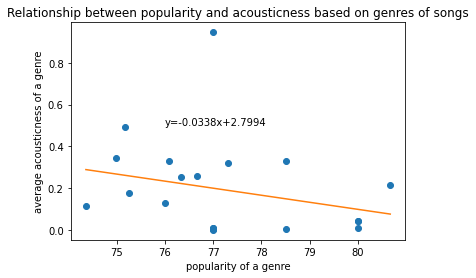

Correlation coefficient between popularity and acouticness is 0.0699


In [16]:
# Acousticness
x1 = df4['popularity']
y1 = df4['acousticness']
plt.plot(x1, y1, 'o')

plt.title("Relationship between popularity and acousticness based on genres of songs")
plt.xlabel("popularity of a genre")
plt.ylabel("average acousticness of a genre")

m, b, r_val, p_val, std_err = stats.linregress(x1,y1)
plt.plot(x1,m*x1+b)
plt.text(76, 0.5, "y={:.4f}x+{:.4f}".format(m,b))

plt.show()

print("Correlation coefficient between popularity and acouticness is {:.4f}".format(r_val**2))

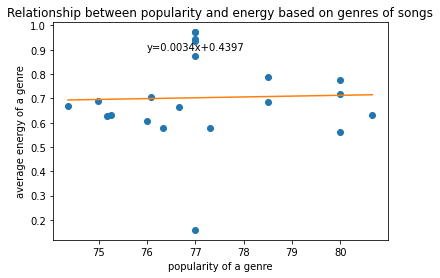

Correlation coefficient between popularity and energy is 0.0011


In [17]:
# Energy
x2 = df4['popularity']
y2 = df4['energy']
plt.plot(x2, y2, 'o')

plt.title("Relationship between popularity and energy based on genres of songs")
plt.xlabel("popularity of a genre")
plt.ylabel("average energy of a genre")

m, b, r_val, p_val, std_err = stats.linregress(x2,y2)
plt.plot(x2,m*x2+b)
plt.text(76, 0.9, "y={:.4f}x+{:.4f}".format(m,b))

plt.show()

print("Correlation coefficient between popularity and energy is {:.4f}".format(r_val**2))

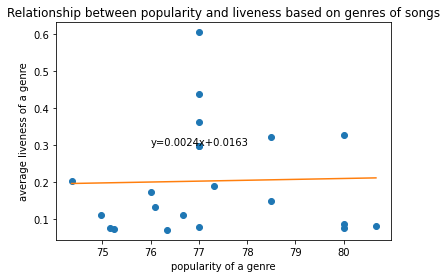

Correlation coefficient between popularity and liveness is 0.0009


In [18]:
# Liveness
x3 = df4['popularity']
y3 = df4['liveness']
plt.plot(x3, y3, 'o')

plt.title("Relationship between popularity and liveness based on genres of songs")
plt.xlabel("popularity of a genre")
plt.ylabel("average liveness of a genre")

m, b, r_val, p_val, std_err = stats.linregress(x3,y3)
plt.plot(x3,m*x3+b)
plt.text(76, 0.3, "y={:.4f}x+{:.4f}".format(m,b))

plt.show()

print("Correlation coefficient between popularity and liveness is {:.4f}".format(r_val**2))

As shown above,according to R^2 value, none of parameters has significant correlation with popularity, while acouticness shows relatively stronger correlation to popularity compared to the other two.


# Improvement-Modeling

Instead of randomly taking three features of song and compare with popularity, I want to find if there exists any features that has correlation with popularity.

In [19]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
df_model = df_genres.sort_values(by='popularity',ascending=False)
df_model = df_model.iloc[0:20]
df_model.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2778,0,turkish edm,0.008290,0.698,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
2533,1,south african house,0.043833,0.847,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
46,0,alberta hip hop,0.330000,0.885,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11


In [29]:
features = df_model.drop(columns=['genres','popularity'])
X = sm.add_constant(features)
y = df_model['popularity']
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1.467
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.314
Time:                        07:54:10   Log-Likelihood:                -25.955
No. Observations:                  20   AIC:                             77.91
Df Residuals:                       7   BIC:                             90.86
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               84.0849      8.329     10.095      0.000      64.389     103.780
mode                 1.5229      1.617      0.942      0.378      -2.301       5.347
acousticness       -12.2332      5.424     -2.255      0.059     -25.058       0.592
danceability         8.6648      7.927      1.093      0.311     -10.080      27.410
duration_ms      -8.123e-06    1.2e-05     -0.678      0.519   -3.64e-05    2.02e-05
energy             -13.0696      9.629     -1.357      0.217     -35.839       9.700
instrumentalness    -3.9050      3.002     -1.301      0.235     -11.004       3.194
liveness            10.3406      6.338      1.632      0.147      -4.646      25.327
loudness             0.2184      0.389      0.561      0.592      -0.703       1.139
speechiness         -5.9795     11.143     -0.537      0.608     -32.329      20.370
tempo               -0.0115      0.036     -0.323      0.756      -0.096       0.073
valence              0.6163      3.076      0.200      0.847      -6.658       7.891
key                  0.1279      0.205      0.625      0.552      -0.356       0.612
==============================================================================
Omnibus:                        8.456   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.951
Skew:                          -0.410   Prob(JB):                      0.00690
Kurtosis:                       6.357   Cond. No.                     1.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As shown above, acousticness holdes the lowest pvalue, however it's still not low enough to pass the test. Thus, none of the features listed in this dataset has statistic significance to the popularity of a song. 

In another word, by adjusting any listed technical features of a song cannot make a song more popular.